Avaliação - Unidade 02
===

Identificação dos alunos (nome completo): 

- Este trabalho irá compor 40% da segunda unidade.
- Grupo de até dois alunos.
- Os alunos deverão enviar (apenas um por grupo) através do Sigaa, o notebook e os datasets gerados na avaliação em um arquivo compactado (.zip). 
- Todas as respostas devem ser realizadas através de código python e os resultados explicados em estilo markdown
- As informações (datasets) necessárias para resolução dos problemas podem ser encontradas em http://dados.ufrn.br/group/ensino


1. (1 ponto) Quantas e quais disciplinas com código IMD foram consolidadas em 2017.1? 
**Dica:** 
>```python
df[df['A'].str.contains("hello")]
```
2. (3 pontos) Realize um estudo envolvendo as propriedades de **assimétria** e **curtose** para as turmas IMD0033 (probabilidade) consolidadas em 2017.1. Utilize gráficos e explique os resultados. Reforce também os horários das disciplinas nos resultados. 
3. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções **facetgrid** e **map**) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos. 
4. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição. 

In [19]:
import pandas as pd

turmas = pd.read_csv("turmas-2017.1.csv", sep = ";")
turmas_imd = turmas[turmas['codigo'].str.contains("IMD")]
turmas_imd_cons = turmas_imd[turmas_imd['situacao_turma'].str.contains("CONSOLIDADA")]
turmas_imd_cons = turmas_imd_cons[~turmas_imd_cons.duplicated('id_turma')]
print('1. Foram consolidadas ' + str(len(turmas_imd_cons)) + ' turmas das seguintes disciplinas:')
print(turmas_imd_cons['codigo'].unique())

1. Foram consolidadas 93 turmas das seguintes disciplinas:
['IMD0019' 'IMD0017' 'IMD0018' 'IMD0020' 'IMD0012.0' 'IMD0012.1' 'IMD0024'
 'IMD0027' 'IMD0028' 'IMD0034' 'IMD0029' 'IMD0030' 'IMD0033' 'IMD0038'
 'IMD0039' 'IMD0040' 'IMD0041' 'IMD0105' 'IMD0308' 'IMD0319' 'IMD0322'
 'IMD0323' 'IMD0324' 'IMD0328' 'IMD0403' 'IMD0405' 'IMD0408' 'IMD0409'
 'IMD0414' 'IMD0415' 'IMD0423' 'IMD0505' 'IMD0506' 'IMD0512' 'IMD0517'
 'IMD0524' 'IMD0701' 'IMD0705' 'IMD0822' 'IMD0521' 'IMD0043' 'IMD0110'
 'IMD0709' 'IMD0725' 'IMD0271' 'IMD0707' 'IMD0708' 'IMD0086' 'IMD0081'
 'IMD0079' 'IMD0090' 'IMD0082']


Valores - Curtose 
Turma 1: -1.00 
Turma 2: -0.92
Notamos que há um 'achatamento' maior na turma 2.
Isso é normal pois podemos ver que há mais reprovações nela que há na turma 1.

Valores - Assimetria 
Turma 1: -0.26 
Turma 2: 0.19
Como os valores de assimetria são próximos de zero, podemos dizer que a distribuição das
notas se dá de forma 'centralizada' com relação a média



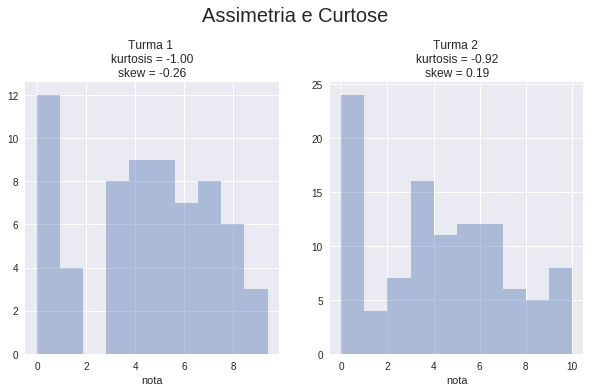

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
#Assimetria
from scipy.stats import skew
#Curtose
from scipy.stats import kurtosis

matricula_comp = pd.read_csv("matricula-componente-20171.csv", ";")

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2, nrows=1)

probabilidade = turmas_imd_cons[turmas_imd_cons['codigo'].str.contains("IMD0033")]
id_probabilidade = list(probabilidade['id_turma'])

matricula_comp_id_turma1 = matricula_comp[matricula_comp['id_turma'] == id_probabilidade[0]]
matricula_comp_id_turma2 = matricula_comp[matricula_comp['id_turma'] == id_probabilidade[1]]

turma1 = matricula_comp_id_turma1.dropna()
turma2 = matricula_comp_id_turma2.dropna()

assimetria_turma1 = skew(turma1['nota'])
curtose_turma1 = kurtosis(turma1['nota'])

assimetria_turma2 = skew(turma2['nota'])
curtose_turma2 = kurtosis(turma2['nota'])

# main title
plt.suptitle("Assimetria e Curtose", fontsize=20, y = 1.09)

### Titles of subplots
ax1.set_title("Turma 1 \nkurtosis = %.2f"%curtose_turma1 + "\n" +
              "skew = %.2f"%assimetria_turma1, fontsize=12)
ax2.set_title("Turma 2 \nkurtosis = %.2f"%curtose_turma2 + "\n" +
              "skew = %.2f"%assimetria_turma2, fontsize=12)

sns.distplot(turma1['nota'], kde = False, ax=ax1, bins=10)
sns.distplot(turma2['nota'], kde = False, ax=ax2, bins=10)

print('Valores - Curtose',
      '\nTurma 1: %.2f'%curtose_turma1,
      '\nTurma 2: %.2f'%curtose_turma2,)
print('Notamos que há um \'achatamento\' maior na turma 2.\n' +
      'Isso é normal pois podemos ver que há mais reprovações nela que há na turma 1.\n')
print('Valores - Assimetria',
      '\nTurma 1: %.2f'%assimetria_turma1,
      '\nTurma 2: %.2f'%assimetria_turma2)
print('Como os valores de assimetria são próximos de zero, podemos dizer que a distribuição das\n' +
      'notas se dá de forma \'centralizada\' com relação a média\n')

plt.show()


## (3 pontos) Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções facetgrid e map) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos. 

In [21]:
lp_i = turmas_imd_cons[turmas_imd_cons['codigo'].str.contains("IMD0030")]
id_lp_i = list(lp_i['id_turma'])
for i, t in enumerate(lp_i):
    matricula_comp[matricula_comp['']]

,id_turma,codigo,nome_ascii,docente_interno,docente_externo,nivel_ensino,ano,periodo,capacidade_aluno,local,...,distancia,tipo,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes,campus_turma,Unnamed: 24
5728,57597718,IMD0030,LINGUAGEM DE PROGRAMACAO I,6873acde1de14b806d03eb35bdf59b1b,NaN,GRADUAÇÃO,2017,1,40.0,A309,...,f,1,2017-07-01 11:16:06.118,f,68.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
5729,57597719,IMD0030,LINGUAGEM DE PROGRAMACAO I,c509afa8395e7a3a4f36a5e45b9702d9,NaN,GRADUAÇÃO,2017,1,43.0,A307,...,f,1,2017-07-07 19:14:48.526,f,72.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
5758,57597731,IMD0030,LINGUAGEM DE PROGRAMACAO I,07fccd8ae318c5d35556f21887d7f3be,NaN,GRADUAÇÃO,2017,1,32.0,A304,...,f,1,2017-07-08 18:23:29.886,f,74.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
9873,57600132,IMD0030,LINGUAGEM DE PROGRAMACAO I,d39602a42d978b2d4796163a3c327363,NaN,GRADUAÇÃO,2017,1,32.0,CIVT - A303,...,f,1,2017-07-07 13:26:02.533,f,72.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN


In [ ]:
matricula_comp_lp_id_turma1 = matricula_comp[matricula_comp['id_turma'] == id_lp_i[0]]
matricula_comp_lp_id_turma2 = matricula_comp[matricula_comp['id_turma'] == id_lp_i[1]]
matricula_comp_lp_id_turma3 = matricula_comp[matricula_comp['id_turma'] == id_lp_i[2]]
matricula_comp_lp_id_turma4 = matricula_comp[matricula_comp['id_turma'] == id_lp_i[3]]

turma1 = matricula_comp_lp_id_turma1.dropna()
turma2 = matricula_comp_lp_id_turma2.dropna()
turma3 = matricula_comp_lp_id_turma3.dropna()
turma4 = matricula_comp_lp_id_turma4.dropna()


## (3 pontos) Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição. 

In [62]:
edb_i = turmas_imd_cons[turmas_imd_cons['codigo'].str.contains("IMD0029")]
id_edb_i = list(edb_i['id_turma'])

edb_i

,id_turma,codigo,nome_ascii,docente_interno,docente_externo,nivel_ensino,ano,periodo,capacidade_aluno,local,...,distancia,tipo,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes,campus_turma,Unnamed: 24
5575,57597598,IMD0029,ESTRUTURA DE DADOS BASICAS I,6873acde1de14b806d03eb35bdf59b1b,NaN,GRADUAÇÃO,2017,1,40.0,A305,...,f,1,2017-07-06 19:06:28.706,f,70.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
5713,57597708,IMD0029,ESTRUTURA DE DADOS BASICAS I,720215bd5ef08b0421b32b1c66b02ee7,NaN,GRADUAÇÃO,2017,1,42.0,A306,...,f,1,2017-07-08 16:59:21.532,f,72.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
5714,57597710,IMD0029,ESTRUTURA DE DADOS BASICAS I,84db41d37e5dd55e693b4a45110a5e5b,NaN,GRADUAÇÃO,2017,1,32.0,A307,...,f,1,2017-07-06 19:01:37.897,f,72.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
9872,57600131,IMD0029,ESTRUTURA DE DADOS BASICAS I,d39602a42d978b2d4796163a3c327363,NaN,GRADUAÇÃO,2017,1,32.0,A303,...,f,1,2017-07-01 16:19:57.865,f,72.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN


In [63]:
qnt_id = len(id_edb_i)
qnt_id

4

In [67]:
matricula_comp_edb_id = []
for i in range(qnt_id):
    matricula_comp_edb_id.append(matricula_comp[matricula_comp['id_turma'] == id_lp_i[i]])
matricula_comp_edb_id[3]

# turma1 = matricula_comp_lp_id_turma1.dropna()
# turma2 = matricula_comp_lp_id_turma2.dropna()
# turma3 = matricula_comp_lp_id_turma3.dropna()
# turma4 = matricula_comp_lp_id_turma4.dropna()


,id_turma,id_discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,situacao
305335,57600132,42c01d3cfdec6ead5b93dfb4cf3af266,92127264.0,3.0,6.9,f,0.0,7.6,0.0,APROVADO
305336,57600132,42c01d3cfdec6ead5b93dfb4cf3af266,92127264.0,2.0,7.2,f,0.0,7.6,0.0,APROVADO
305337,57600132,42c01d3cfdec6ead5b93dfb4cf3af266,92127264.0,1.0,8.8,f,0.0,7.6,0.0,APROVADO
305338,57600132,10d88454fabcfe5b309f3cdef7283f80,92127264.0,3.0,8.4,f,0.0,8.1,0.0,APROVADO
305339,57600132,10d88454fabcfe5b309f3cdef7283f80,92127264.0,2.0,7.0,f,0.0,8.1,0.0,APROVADO
305340,57600132,10d88454fabcfe5b309f3cdef7283f80,92127264.0,1.0,8.8,f,0.0,8.1,0.0,APROVADO
305341,57600132,36ed3b7c0594c7b3e4ecdd3a8c8e16d2,17848940.0,3.0,8.4,f,0.0,5.4,16.0,REPROVADO POR NOTA
305342,57600132,36ed3b7c0594c7b3e4ecdd3a8c8e16d2,17848940.0,2.0,2.4,f,0.0,5.4,16.0,REPROVADO POR NOTA
305343,57600132,36ed3b7c0594c7b3e4ecdd3a8c8e16d2,17848940.0,1.0,5.3,f,0.0,5.4,16.0,REPROVADO POR NOTA
305344,57600132,2e2c671905cd0f9394c91003ab0b84c3,92127264.0,3.0,0.0,f,0.0,3.5,32.0,REPROVADO POR MÉDIA E POR FALTAS
